# Laboratorio 2. CNYT
*Martes 18 de agosto de 2020* / 
**Nombre: Ana Gabriela Silva**

In [5]:
#Importación
from qiskit import QuantumCircuit #Clase para crear circuitos
from qiskit import execute #Función para ejecutar simulaciones o trabajos en computadores cuánticos reales.
from qiskit import Aer #Módulo donde encontramos el acceso al simulador
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector #Visualizador del output como gráfico de barras
from math import sqrt, pi
%matplotlib inline 

## **Ejercicio 1**

$$|\psi\rangle = \frac{1+i}{4} |0\rangle + \frac{-\sqrt{7}}{2\sqrt{2}}  |1\rangle$$ 

In [2]:
#Declaro y lleno un circuito
circuito_ejercicio1 = QuantumCircuit(1) # 1 alambre cuántico (1 qubit) 
initial_state = [(1+1j)/4, -sqrt(7)/(2*sqrt(2))] #Estado inical |𝜓⟩ = 1+i/4 |0⟩ + ⎯ √7/2√2 |1⟩
circuito_ejercicio1.initialize(initial_state, 0) #Inicialización

In [3]:
#Dibujo del circuito
circuito_ejercicio1.measure_all()
circuito_ejercicio1.draw('text')

┌─────────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.25+0.25j,-0.93541) ├─░─┤M├
        └─────────────────────────────────┘ ░ └╥┘
meas_0: ═══════════════════════════════════════╩═

_**Experimento 1.1:**_ 1 shot con simulador.

In [4]:
#Simulamos una ejecución 
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(circuito_ejercicio1, backend = simulador,shots=1)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

{'1': 1}


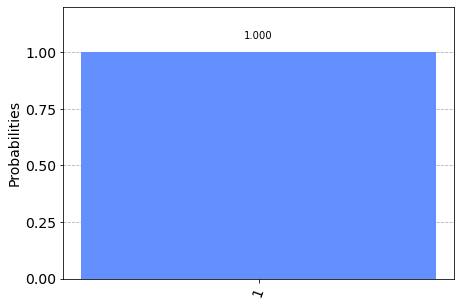

In [5]:
plot_histogram(conteos)

_**Experimento 1.2:**_ 1000 shots con simulador.

In [6]:
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(circuito_ejercicio1, backend = simulador,shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

{'0': 128, '1': 872}


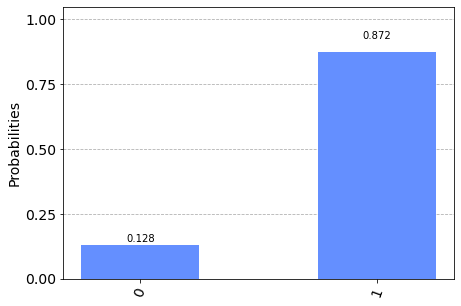

In [7]:
plot_histogram(conteos)

_**Experimento 1.3:**_ 1000 shots con computador cuántico.

In [9]:
#Ejecucion en un computador cuántico real
from qiskit import IBMQ
IBMQ.load_account()

proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_essex')
ejecucion = execute(circuito_ejercicio1, backend = comp_cuantico, shots=1000)

from qiskit.tools.monitor import job_monitor

job_monitor(ejecucion)

resultado = ejecucion.result() 
conteos = resultado.get_counts()

print(conteos)

ibmqfactory.load_account:WARNING:2020-08-19 16:04:36,170: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
{'0': 182, '1': 818}


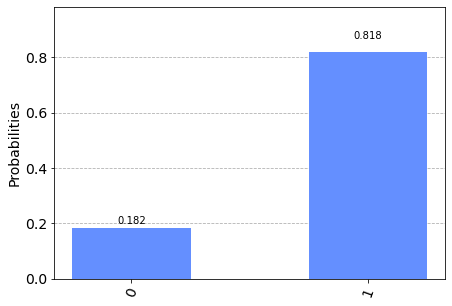

In [10]:
plot_histogram(conteos)

**Conclusiones ejercicio 1.**

- En el experimento número uno, dió la respuesta esperada a la suma. ya que la suma de cuadrados de alpha y beta (cada sumando en valor absoluto) debe ser uno. En este caso, $$(\frac{\sqrt{2}}{4})^2 + (\frac{\sqrt{2}}{2\sqrt{2}})^2 = \frac{2}{16} +\frac{7}{8} = 1$$  El resultado 1 indica que el cien porciento de probabilidad de la respuesta debía estar en el estado  |1⟩.

- El experimento número dos se ejecutó en el backend qasm_simulator, de igual forma se esperaba que la repuesta fuera el 100% de probabilidad para el estado |1⟩, sin embargo hubo un porcentaje de error, a continuación los datos:


| Estado Cero	| Estado Uno 	|
|:-:	|:-:	|
| 0.128 	| 0.872 	|
| 12.8% 	| 87.2% 	|




- El experimento tres se ejecutó en el backend **ibmq_essex**, de igual forma se esperaba que la repuesta fuera el 100% de probabilidad para el estado |1⟩, sin embargo hubo un error del  18.2%  ya que se debe a que estamos trabajando en un computador cuántico real el cual es susceptible al ruido (por ejemplo electromagnético) y a errores de medición. Los datos de este experimento:


| Estado Cero	| Estado Uno	|
|:-:	|:-:	|
| 0.182 	| 0.818 	|
| 18.2% 	| 81.8% 	|



Entre los dos simuladores, con los 1000 shots, en el computador cuántico el porcentaje de error de las ejecuciones fue mayor al del simulador. Igualmente la diferencia entre las dos ejecuciones fue del 5.4%.



## Ejercicio 2.

Esfera de Bloch.

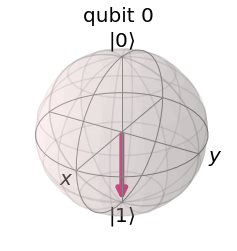

In [11]:
backend = Aer.get_backend('statevector_simulator')
out_state = execute(circuito_ejercicio1,backend).result().get_statevector()
plot_bloch_multivector(out_state)

**Conclusiones ejercicio 2.**
En la esfera de bloch podemos ver el vector guiado hacia el estado 1, ya que es la respuesta a este circuito. 

## Ejercicio 3
 Encuentra parámetros θ,ϕ y λ (son ángulos en radianes) tales que si inicializas 1 qubit aplicando sólo una compuerta U3(θ,ϕ,λ), mides y ejecutas tu circuito con 1000 shots, obtengas el estado |0⟩ el 30% de las veces y el estado |1⟩ el 70% de las veces

In [61]:
from math import pi

In [71]:
circuito_ejercicio_3 = QuantumCircuit(1,1)
circuito_ejercicio_3.u3(2*pi/3,4*pi/3,0,0)
circuito_ejercicio_3.measure(0,0)

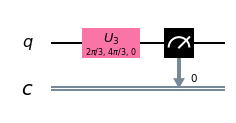

In [72]:
circuito_ejercicio_3.draw(output='mpl')

In [73]:
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(circuito_ejercicio_3, backend = simulador,shots=1000)
resultado = ejecucion.result()
conteos = resultado.get_counts()
print(conteos)

{'1': 727, '0': 273}


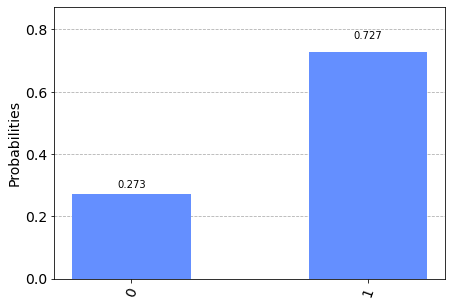

In [74]:
plot_histogram(conteos)

 **Conclusiones ejercicio 3**
 
 Este experimento se ejecutó en el backend **qasm_simulator**. Se esperaba que el 30% de probabilidad fuera del estado $|0\rangle$ y el otro 70% del estado $|1\rangle$. Sin embargo: 

| Estado $|0\rangle$  	| Estado $|1\rangle$	|
|:-:	|:-:	|
| 0.273	| 0.727 	|
| 27,3% 	| 72,7% 	|

Hubo una diferencia de 2.7% entre los dos estados ya que la respuesta se basa en los angulos escogidos para la compuerta para que diera la respuesta exacta o más cercana. Al ir cambiando los tres ángulos me di cuenta que para obtener un pocentaje mayor en el estado $|1\rangle$ hay que utilizar en los dos parametros ángulos mayor a $\frac{\pi}{2}$, debido a esto, si se utilizan ángulos menores el estado con mayor pocentaje será el estado $|0\rangle$  

 

## Ejercicio 4

**¿Cuál es el número RSA más pequeño que aún no se ha podido factorizar?¿Cuántos bits tiene?, ¿cuán larga es su expresión decimal?**

El RSA-250 es el número más pequeño que aún no se ha podido factorizar, tiene 829 bits y su expresión décimal tiene como longitud 250 dígitos. 

**¿Cómo se compara con el número RSA más grande factorizado hasta el momento?**

El RSA-240 es el número más grande ya factorizado. Se factorizó el 2 de diciemre de 2019 por el grupo CARAMBA (Cryptology, ARithmetic: Algebraic Methods for Better Algorithms) en Francia; tiene 795 bits y su expresión décimal tiene como longitud 240 dígitos. 

